In [293]:
# 1 Phase de pretraitement
    
import pandas as pd

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import seaborn as sns

# import dataset
my_frame = pd.read_csv('titanic.csv',sep=';')

#my_frame.columns
my_frame.columns= my_frame.columns.str.replace(' ', '_')

#my_frame.values
#my_frame.shape

#my_frame.describe()
#my_frame.duplicated()


# recherche de données manquants

#my_frame.isnull().sum()
    
    
# remplacer les données manquants

my_frame['Cabin'].mode()
my_frame['Cabin'].fillna('C27', inplace=True)

my_frame['Embarked'].mode()
my_frame['Embarked'].fillna('S', inplace=True)

my_frame['Age'].fillna(my_frame['Age'].mean(), inplace=True)

# Encodage
encoder = LabelEncoder()

#my_frame['Survived'] = encoder.fit_transform(my_frame['Survived'])

#my_frame['Name'] = encoder.fit_transform(my_frame['Name'])

#my_frame['Sex'] = encoder.fit_transform(my_frame['Sex'])

#my_frame['Ticket'] = encoder.fit_transform(my_frame['Ticket'])

#my_frame['Cabin'] = encoder.fit_transform(my_frame['Cabin'])

#my_frame['Embarked'] = encoder.fit_transform(my_frame['Embarked'])

#my_frame.info()

# Verication finale
my_frame.isnull().sum()

<bound method NDFrame._add_numeric_operations.<locals>.sum of PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64>

<AxesSubplot:title={'center':"histogramme de l'age des passagers"}, xlabel='AGE', ylabel='Frequency'>

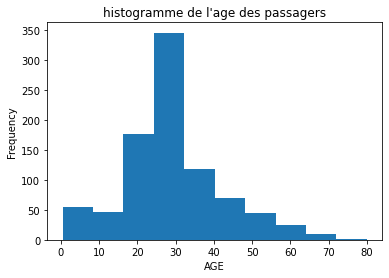

In [294]:

# 2. Phase de visualisation :
# 2.1
# selection de variables : age, sexe, Pclass 

#age:

plt.title("histogramme de l'age des passagers")
plt.xlabel("AGE")
my_frame["Age"].plot.hist()


(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

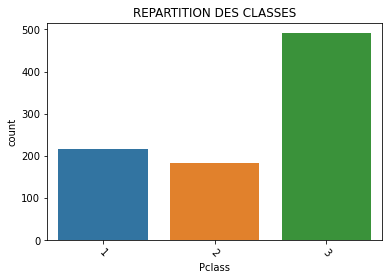

In [295]:
#CLASSE:
plt.title("REPARTITION DES CLASSES")
sns.countplot(x="Pclass", data=my_frame)
plt.xticks(rotation=-45)

<AxesSubplot:title={'center':'REPARTITION DU SEXE'}, xlabel='Sex', ylabel='count'>

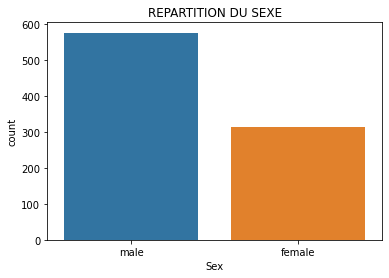

In [296]:
# sexe
plt.title("REPARTITION DU SEXE")
sns.countplot(x="Sex",data=my_frame)

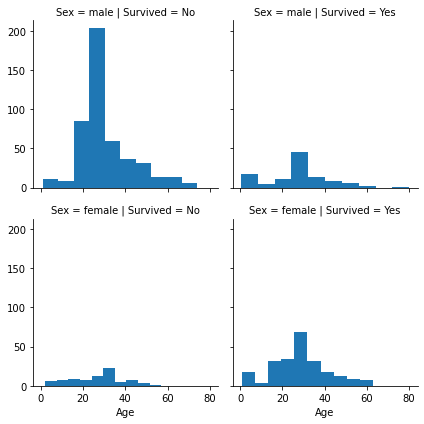

In [297]:
# 2.2
# correlation age et sexe
coll=sns.FacetGrid(data=my_frame, row="Sex", col="Survived")
coll.map(plt.hist,"Age",bins=10)

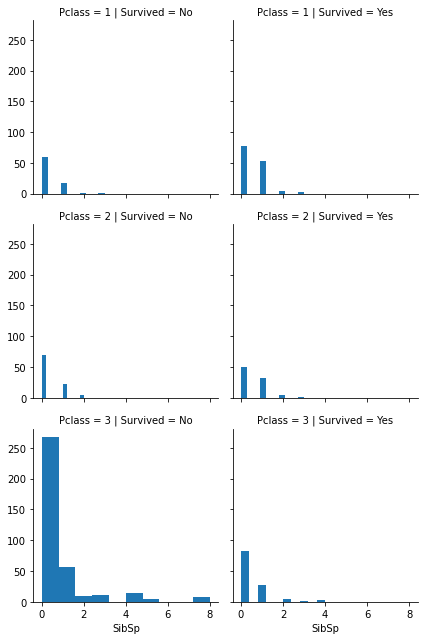

In [298]:
# correlation : Pclasse et SibSp

coll1=sns.FacetGrid(data=my_frame, row="Pclass", col="Survived")
coll1.map(plt.hist, "SibSp", bins=10)

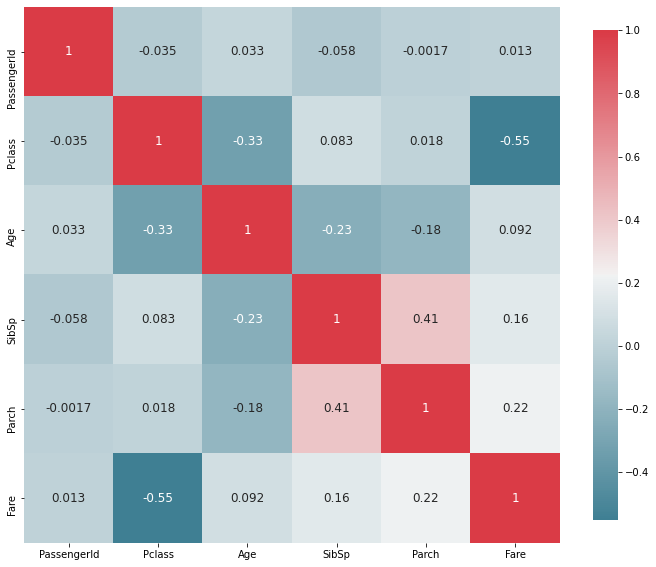

In [299]:
# 2.3 : test de fonction

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )   
plot_correlation_map(my_frame)  

# Analyse de la fonction:
#The plot_correlation_map function makes it possible to perform
#correlations between the functionalities of a digital category of a
#Dataframe on a map followed by a scale represented by a 
#colorimetric band. Each square on the map is colored and is assigned
#a value based on the result of the correlation.


In [300]:
# groupby Pclasse et survived

my_frame.groupby(['Pclass','Survived']).mean()

PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      No         410.300000  40.896074  0.287500  0.300000  64.684008
       Yes        491.772059  34.784615  0.492647  0.389706  95.608029
2      No         452.123711  33.266947  0.319588  0.144330  19.412328
       Yes        439.080460  26.076166  0.494253  0.643678  22.055700
3      No         453.580645  27.417500  0.672043  0.384409  13.669364
       Yes        394.058824  23.232689  0.436975  0.420168  13.694887

In [301]:
#la fonctionalité Titre:
# my_frame.drop('Name',axis=1)
plo = pd.DataFrame(my_frame.Name.str.split().tolist())

my_frame = my_frame.assign(Titre=plo[1])

my_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titre
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,C27,S,Mr.
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr.
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,C27,S,Mr.
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,C27,S,Mrs.
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr.


In [302]:
# correlation Titre Fare et Age

my_frame[["Titre", "Fare"]].groupby(["Titre"], as_index=True).mean()

my_frame[["Titre", "Age"]].groupby(["Titre"], as_index=True).mean()

,Age
Titre,
"Billiard,",40.500000
Capt.,70.000000
"Carlo,",29.000000
Col.,58.000000
"Cruyssen,",47.000000
Don.,40.000000
Dr.,40.242731
"Gordon,",48.500000
"Impe,",25.333333


In [285]:
# utilisation de Titre_Dictionnaire:
Title_Dictionary = {

                    "Capt.":       "Officer",

                    "Col.":        "Officer",

                    "Major.":      "Officer",

                      "Dr.":         "Officer",

                    "Rev.":        "Officer",

                    "Jonkheer.":   "Royalty",

                    "Don.":        "Royalty",

                    "Sir." :       "Royalty",

                   "Lady." :      "Royalty",

                  "the Countess.": "Royalty",

                    "Dona.":       "Royalty",

                    "Mme.":        "Miss",

                    "Mlle.":       "Miss",

                    "Miss." :      "Miss",

                    "Ms.":         "Mrs",

                    "Mr." :        "Mrs",

                    "Mrs." :       "Mrs",

                    "Master." :    "Master"

                   }
# regroupement des titres

lis=list(Title_Dictionary.keys())

fram=my_frame[my_frame.Titre.isin(lis)]

fram.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titre
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,C27,S,Mr.
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr.
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,C27,S,Mr.
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,C27,S,Mrs.
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr.


In [287]:

# Visualisation des nouveaux titre

fram[["Titre", "Fare"]].groupby(["Titre"], as_index=True).mean()


,Fare
Titre,
Capt.,71.000000
Col.,31.025000
Don.,27.720800
Dr.,49.168457
Jonkheer.,0.000000
Major.,28.525000
Master.,34.703125
Miss.,44.219020
Mlle.,59.402100


In [288]:
fram[["Titre", "Age"]].groupby(["Titre"], as_index=True).mean()


,Age
Titre,
Capt.,70.000000
Col.,58.000000
Don.,40.000000
Dr.,40.242731
Jonkheer.,38.000000
Major.,48.500000
Master.,7.086662
Miss.,23.425521
Mlle.,24.000000


<AxesSubplot:xlabel='Familysize', ylabel='Frequency'>

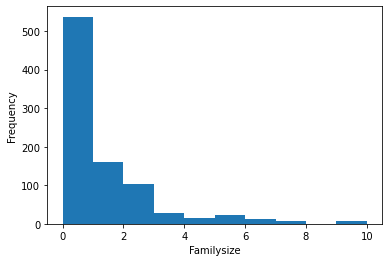

In [289]:
# familysize
 # 1 creation 
my_frame["Familysize"] = my_frame["Parch"] + my_frame["SibSp"]

# visualisation
plt.xlabel("Familysize")
my_frame["Familysize"].plot.hist()


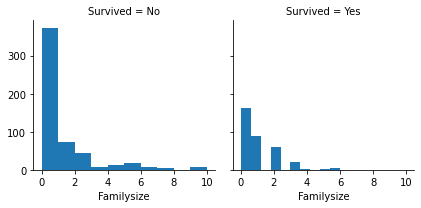

In [290]:
# correlation

cor_fam=sns.FacetGrid(data=my_frame, col="Survived")
cor_fam.map(plt.hist,"Familysize",bins=10)

# conclutsion:
#Surviving individuals have a family size of less than 6, so the feature 
#is useful because the person has a better chance of surviving the 
#smaller their family size.
